###Install and import dependencies
Keras is the high level API for building neural netowrks inside tensorflow.\
Matplotlib is to visualise images.

In [15]:
!pip install tensorflow --quiet
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

###Load the dataset
* Download the data set and plit into training and test sets.
* x is the image array and y is the integer labels.
* _imshow_ shows the image and _shape_ shows the dimensions of the array.
* Each image is 28x28 pixels, grayscale. 60k training images.

Training set: (60000, 28, 28)
Test set: (10000, 28, 28)


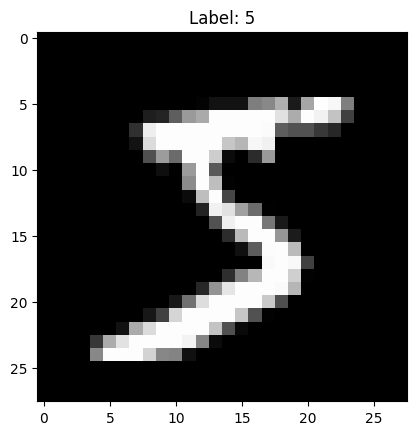

In [16]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

print("Training set:", X_train.shape)
print("Test set:", X_test.shape)

# Visualize one example
plt.imshow(X_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.show()

###Preprocess the data
* Add a channel dimension (-1) which means infering the number of images.
* More spatial resolutions for convolution layers but increases memory and compute.
* Converting to RGB is a good practice. Shape now becomes (64,64,3) but in mnsit can use single channel output so not necessary. But this pipeline is compatible with transfer learning and real world CNNs.
* Normalisation by dividing every pixel value by 255 (integers are from 0-255), mapping value from 0.0-10.0 so now inputs are small and on a similar scale.
* Convert each integer label to a vector length 10 (one-hot labels) since Keras expect on-hot labels with loss='categorical_crossentropy'. Note: integer labels can work fine for sparse_categorical_crossentropy.

In [17]:
#Resize the data to (64,64)  and converting to RGB
x_train_resized=tf.image.resize(X_train.reshape(-1,28,28,1),(64,64))
x_train=tf.image.grayscale_to_rgb(x_train_resized)

x_test_resized=tf.image.resize(X_test.reshape(-1,28,28,1),(64,64))
x_test=tf.image.grayscale_to_rgb(x_test_resized)

#Normalise the data
x_train = x_train / 255.0
x_test = x_test / 255.0

#Labels to categorical
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)


###Build the nerual network
####Sequential Class
Allows developers to build models layer-by-layer in a linear stack.\
Each layer takes the output from the previous layer as its input. Input data flows through several transformations to produce a final prediction.\
It doesnot support models with multiple inputs or outputs or architectures that require shared layers or complex brnaching.

####Performing CNN over Simple Dense Network
CNNS exploit spatial relationship whereas dense networs treat all pixels independently.

####Adding Conv Layers
* Conv2D uses 32 filters of size 3x3 to scan the image and detect patterns like edges, curves,etc.
* activation = 'relu' applies ReLU (Rectified Linear Unit) whiich keeps positive values and zeroes out of negatives. Adds non-linearity so the model can learn complex patterns.

####MaxPooling
Reduces the size of feature maps => for each 2x2 block keeps only the largest value or the strongest feature. Acts like a compression layer => shrinks conv output from 64x64 to 32x32.

####Flatten
3D output (height, weight, channels) to 1D vector since Neural netowrks need 1D inputs for Dense (fully connected) layers.

####Dense(128, activation='relu')
Standard Fully Connected layer.
####Dense(10, activation='softmax')
Final layer - has 10 output neurons. Softmax converts raw outputs into probabilities that sum to 1.
[0.05,0.4,..] => Probability the image is of number 1 is 4/10.

In [18]:
model=keras.Sequential()

# Add layers to the model
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 30752)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     3,936,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,938,570 (15.02 MB)

 Trainable params: 3,938,570 (15.02 MB)

 Non-trainable params: 0 (0.00 B)

###Compile the model

1.   Optimizer: The algorithm used to update the model’s weights. Common optimizers include adam, sgd, and rmsprop.
2. Loss Function: Measures how well the model’s predictions match the true labels. For classification problems, categorical_crossentropy is commonly used.
3. Metrics: Additional metrics like accuracy can be monitored during training.



In [19]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

###Training the
* One epoch means one complete pass through the entire training dataset.\
_Too many epochs => model starts to memorise data => overfitting._
* Start small and increase epoch only if training loss is still improving and accuracy isn't dropping.
* batch_size The model doesn’t update weights after every single image — it groups images into “mini-batches.”\
Each batch runs forward + backward propagation, then updates weights once.
* validation_split A fraction of your training data is held out and not used for training.\
Instead, it is used to measure performance after each epoch → helps you detect overfitting.

In [25]:
history = model.fit(x_train, y_train, epochs=7, batch_size=32, validation_split=0.2)

Epoch 1/7
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 180s 120ms/step - accuracy: 0.9983 - loss: 0.0052 - val_accuracy: 0.9808 - val_loss: 0.1196
Epoch 2/7
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 192s 113ms/step - accuracy: 0.9988 - loss: 0.0035 - val_accuracy: 0.9776 - val_loss: 0.1422
Epoch 3/7
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 171s 114ms/step - accuracy: 0.9990 - loss: 0.0034 - val_accuracy: 0.9798 - val_loss: 0.1474
Epoch 4/7
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 204s 115ms/step - accuracy: 0.9982 - loss: 0.0054 - val_accuracy: 0.9828 - val_loss: 0.1303
Epoch 5/7
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 209s 120ms/step - accuracy: 0.9986 - loss: 0.0039 - val_accuracy: 0.9807 - val_loss: 0.1349
Epoch 6/7
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 183s 122ms/step - accuracy: 0.9986 - loss: 0.0036 - val_accuracy: 0.9798 - val_loss: 0.1449
Epoch 7/7
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 174s 116ms/step - accuracy: 0.9986 - loss: 0.0050 - val_accuracy: 0.9816 - val_loss: 0.1485


###Monitoring Validation Accuracy

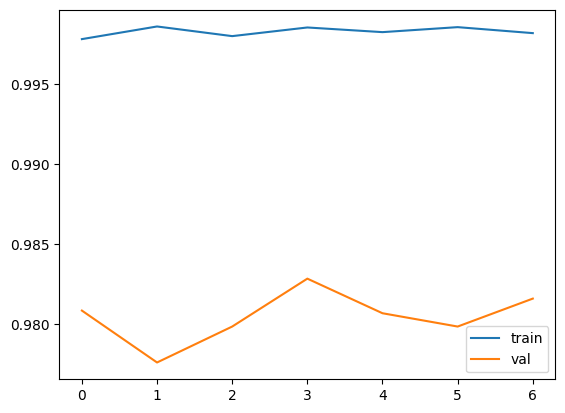

In [26]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.legend(); plt.show()

###Evaluate and test
test_acc is the key metric.

In [27]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.9755 - loss: 0.1774
Test accuracy: 0.9796


###Save the model

In [28]:
model.save("mnist_digit_classifier.h5")

###Make a quick prediction
np.argmax(pred[i]) picks the digit with the highest predicted probability.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


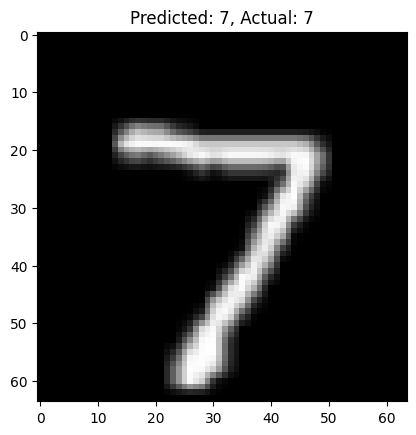

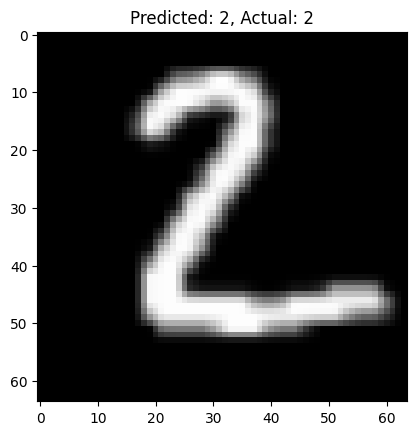

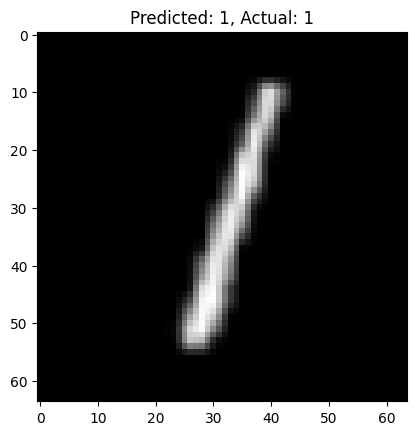

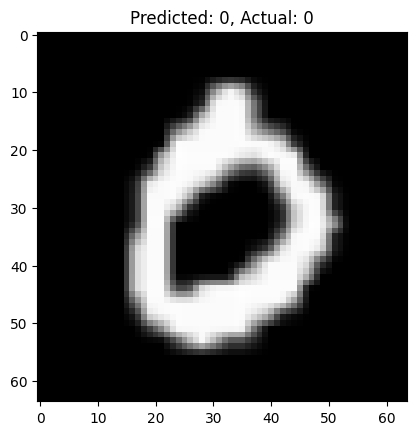

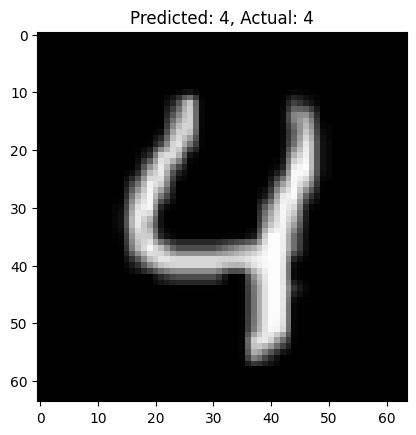

In [30]:
pred = model.predict(x_test[:5])
# Convert one-hot encoded y_test back to integers
y_test_int = np.argmax(y_test, axis=1)
for i in range(5):
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"Predicted: {np.argmax(pred[i])}, Actual: {y_test_int[i]}")
    plt.show()